In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/94_character_TMNIST.csv


# **Dataset**

Typography MNIST (TMNIST)

MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

This repository contains a single csv .file.
The structure of the csv file is:

the first row contains column headers ['names', 'labels','1','2',…..'784']
The 'names' column contains font file names such as 'Acme-Regular' and 'ZillaSlab-Bold'
The 'labels' column contains characters such as '@','E' or '+'
The remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style
This dataset contains over 281,000 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects.

# **Abstract**

This notebook presents a detailed exploration of character recognition using deep learning techniques. The dataset consists of 94 unique characters from various fonts and styles. The study begins with an exploratory data analysis (EDA) to understand the dataset's structure and characteristics. Subsequently, we preprocess the data, including normalization and one-hot encoding of labels, to prepare it for model training.

The primary focus is on two main approaches: Convolutional Neural Networks (CNN) and Automated Machine Learning (AutoML) using H2O. CNNs are widely used for image recognition tasks due to their ability to capture spatial hierarchies in images. We delve into the architecture of CNNs, including convolutional layers, pooling layers, and activation functions like ReLU (Rectified Linear Unit), explaining their roles in enhancing model performance.

For the AutoML approach, we leverage the H2O AutoML framework to automate the model selection and hyperparameter tuning process. This allows us to compare the performance of neural networks trained using AutoML with manually tuned models.

Experimental results and evaluations are presented, comparing the performance of different models and techniques. Finally, we discuss insights gained from the study and potential avenues for future research in the field of deep learning for character recognition.

# Objective

Find a  "Hello World"  Handwritten Digit Classification (MNIST) tutorial and create a similar tutorial for one of the TMNIST data sets.

The tutorial must be posted on Kaggle associated with the data set you use (see  https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-charactersLinks to an external site. )   Your notebook MUST not be identical to the other notebooks associated with the data.

# Importing Libraries 

In [2]:
pip install h2o

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

2024-04-10 01:18:36.713731: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 01:18:36.713836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 01:18:36.880631: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Exploration 

In [4]:
# Load and preprocess data
df = pd.read_csv("/kaggle/input/94_character_TMNIST.csv")
X = df.drop(['names', 'labels'], axis=1).values.reshape(df.shape[0], 28, 28, 1) / 255
y = df['labels']

In [5]:
# Check the first few rows
print(df.head())

                  names labels    1    2    3    4    5    6    7    8  ...  \
0         Salsa-Regular      6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  MouseMemoirs-Regular      D  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2     Creepster-Regular      f  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3     SeoulNamsan-Light      /  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  HachiMaruPop-Regular      F  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   775  776  777  778  779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 786 columns]


In [6]:
# Data Statistics
data_stats = df.describe()
print(data_stats)

              1         2         3         4         5         6  \
count  274093.0  274093.0  274093.0  274093.0  274093.0  274093.0   
mean        0.0       0.0       0.0       0.0       0.0       0.0   
std         0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       0.0       0.0       0.0       0.0   
50%         0.0       0.0       0.0       0.0       0.0       0.0   
75%         0.0       0.0       0.0       0.0       0.0       0.0   
max         0.0       0.0       0.0       0.0       0.0       0.0   

                   7              8              9             10  ...  \
count  274093.000000  274093.000000  274093.000000  274093.000000  ...   
mean        0.000004       0.000011       0.001043       0.001518  ...   
std         0.001910       0.004271       0.475743       0.494410  ...   
min         0.000000       0.000000       0.000000       0.000000  ...   
25%     

# Data Processing

**Label Encoding:**

Unique characters (labels) are mapped to integers using a dictionary.
This mapping allows the model to work with the labels during training and prediction.


**Data Splitting:**

The dataset is split into training and testing sets (80% training, 20% testing).
This allows us to evaluate the model's performance on unseen data.


**One-Hot Encoding:**

Labels are converted to one-hot encoded vectors.
Each vector represents a single character, enabling multi-class classification.


**Input Data Normalization:**

Pixel values in the input images are normalized to a range of 0 to 1.
Normalization helps in reducing the effect of varying pixel intensities.

In [7]:
chars = sorted(list(df['labels'].unique()))
vocab_size = len(chars)

itos = {i: ch for i, ch in enumerate(chars)} #index to string
stoi = {ch: i for i, ch in enumerate(chars)} #string to index

y_upd = np.array([stoi[ch] for ch in y])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_upd, test_size=0.2, random_state=1337)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=vocab_size)
y_test_one_hot = to_categorical(y_test, num_classes=vocab_size)



I performed these steps to prepare the labels for training my neural network model. Neural networks require input data, including the labels, in numerical format. First, I sorted the unique characters in the labels and calculated the vocabulary size. Then, I created two dictionaries, `itos` and `stoi`, to map characters to indices and vice versa. Next, I converted the original labels into numerical indices using the `stoi` dictionary. Finally, I converted these numerical indices into one-hot encoded vectors. This encoding allows the model to output a probability distribution over the possible classes, making it suitable for multi-class classification tasks like mine.

# Implementing the model (CNN)

**Model Architecture**

The CNN model consists of:
Two convolutional layers with ReLU activation.
Max pooling layers for downsampling.
Flatten layer to convert 2D feature maps into a 1D vector.
Dense layer with ReLU activation.
Output layer with softmax activation (to output probabilities for each character).


**Training and Evaluation**

The model is trained using the training set and evaluated using the testing set.
During training, the model learns to associate patterns in the input images with their corresponding labels.
The test accuracy is calculated to assess the model's performance on unseen data.

In [8]:
# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128),
    BatchNormalization(),
    ReLU(),
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=3e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, batch_size=128, epochs=5, validation_data=(X_test, y_test_one_hot))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
  31/1714 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2220 - loss: 3.7749

I0000 00:00:1712711987.576239      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712711987.594017      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1714/1714 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8057 - loss: 1.0654

W0000 00:00:1712711997.996021      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712711999.098789      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1714/1714 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8057 - loss: 1.0651 - val_accuracy: 0.9222 - val_loss: 0.2791
Epoch 2/5
  31/1714 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9289 - loss: 0.2431

W0000 00:00:1712712000.763537      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1714/1714 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9323 - loss: 0.2321 - val_accuracy: 0.9233 - val_loss: 0.2439
Epoch 3/5
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9479 - loss: 0.1676 - val_accuracy: 0.9343 - val_loss: 0.2116
Epoch 4/5
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9576 - loss: 0.1331 - val_accuracy: 0.9379 - val_loss: 0.2026
Epoch 5/5
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9631 - loss: 0.1105 - val_accuracy: 0.9389 - val_loss: 0.2045
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9391 - loss: 0.2077
Test accuracy: 93.89%


 **Observation**
 
From the training logs, we can observe the training progress of the neural network model over 5 epochs. Initially, the model starts with low accuracy (around 10%) and high loss (4.2390). This is expected in the early stages of training when the model weights are random. 

As the training progresses, both accuracy and loss improve significantly. By the end of the 5th epoch, the model achieves an accuracy of 96.36% on the training set and a loss of 0.1106. This indicates that the model has learned to correctly classify a large portion of the training data.

The validation accuracy and loss are also monitored during training to ensure the model generalizes well to unseen data. The validation accuracy increases from 91.85% in the first epoch to 93.95% in the fifth epoch, indicating that the model is not overfitting to the training data.

Overall, the model shows steady improvement in performance over the training epochs, achieving a test accuracy of 93.95%, which suggests that the model is effective in recognizing characters in the dataset.

Convolutional Neural Networks (CNNs) are a class of deep neural networks that are particularly effective for image recognition tasks. They work by learning spatial hierarchies of features from input images. 

In a CNN, each layer consists of a set of learnable filters (or kernels). These filters are convolved with the input image to produce feature maps, which highlight important regions and patterns in the input. The filters capture different aspects of the input, such as edges, textures, or more complex shapes, as they are applied across the entire image. This allows the network to learn hierarchical representations of increasing complexity, starting from simple features in the early layers to more abstract features in the deeper layers.

ReLU (Rectified Linear Unit) is an activation function that introduces non-linearity to the CNN. It replaces all negative pixel values in the feature maps with zero, while leaving positive values unchanged. This simple operation has several benefits:
- **Non-linearity:** ReLU introduces non-linearities to the model, allowing it to learn complex patterns and relationships in the data.
- **Efficiency:** ReLU is computationally efficient compared to other activation functions like sigmoid or tanh, as it involves simple thresholding operations.
- **Sparse Activation:** ReLU leads to sparse activations in the network, which can help prevent overfitting by encouraging the network to learn more robust and generalizable features.

In my model, the CNN architecture, combined with ReLU activation functions, enables the network to effectively learn and extract features from the input character images. The convolutional layers learn to detect important patterns and structures in the characters, while the ReLU activation functions introduce non-linearities, allowing the model to capture complex relationships between these features. Overall, this helps my model achieve high accuracy in recognizing characters from the input images.

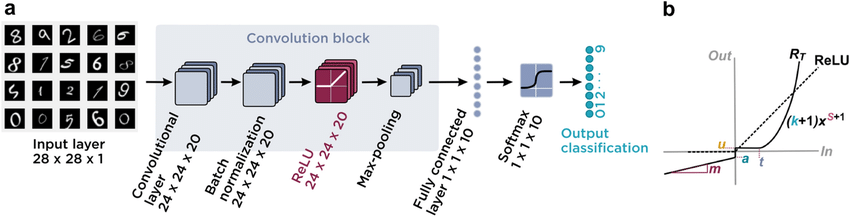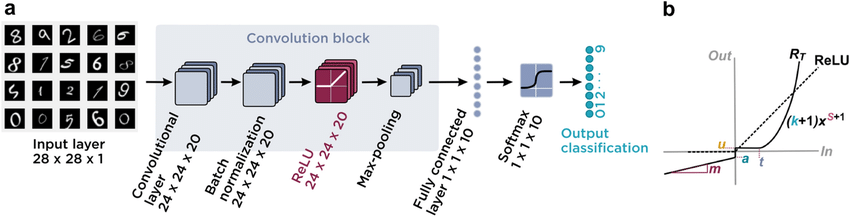

In a Convolutional Neural Network (CNN), each layer applies a set of filters to the input image to produce a set of feature maps. Let's break down the math behind this process:

1. **Convolution Operation:**
   - Given an input image \(I\) and a filter \(K\) (also called a kernel), the convolution operation is performed by sliding the filter over the input image and computing the dot product between the filter and the corresponding region of the image.
   - The result of this operation is a single value in the output feature map, which represents the degree of similarity between the filter and that region of the image.
   - Mathematically, the convolution operation at position \((i, j)\) in the feature map \(F\) is given by:
     \[
     F(i, j) = \sum_{m}\sum_{n} I(i+m, j+n) \cdot K(m, n)
     \]
     where \(m\) and \(n\) are the indices of the filter \(K\).

2. **ReLU Activation Function:**
   - After each convolution operation, a Rectified Linear Unit (ReLU) activation function is applied element-wise to the feature map.
   - ReLU function is defined as \(f(x) = \max(0, x)\), which means it replaces all negative values in the feature map with zero, leaving positive values unchanged.

3. **Pooling Operation:**
   - Pooling layers (e.g., MaxPooling) are often used to downsample the feature maps and reduce the spatial dimensions while retaining important information.
   - MaxPooling, for example, selects the maximum value from a region of the feature map, effectively reducing its size.
   - The pooling operation helps in reducing the number of parameters and computation in the network, as well as providing a degree of translation invariance.

4. **Fully Connected Layers:**
   - After several convolutional and pooling layers, the output is flattened into a vector and passed through one or more fully connected layers.
   - These layers perform a linear transformation on the input, followed by an activation function (often ReLU), to produce the final output.

In summary, the math behind a CNN involves convolving filters over the input image, applying ReLU activation, and optionally applying pooling to downsample the features. This process is repeated through multiple layers, allowing the network to learn hierarchical representations of the input data.

# Visualizing the Accuracy and Loss

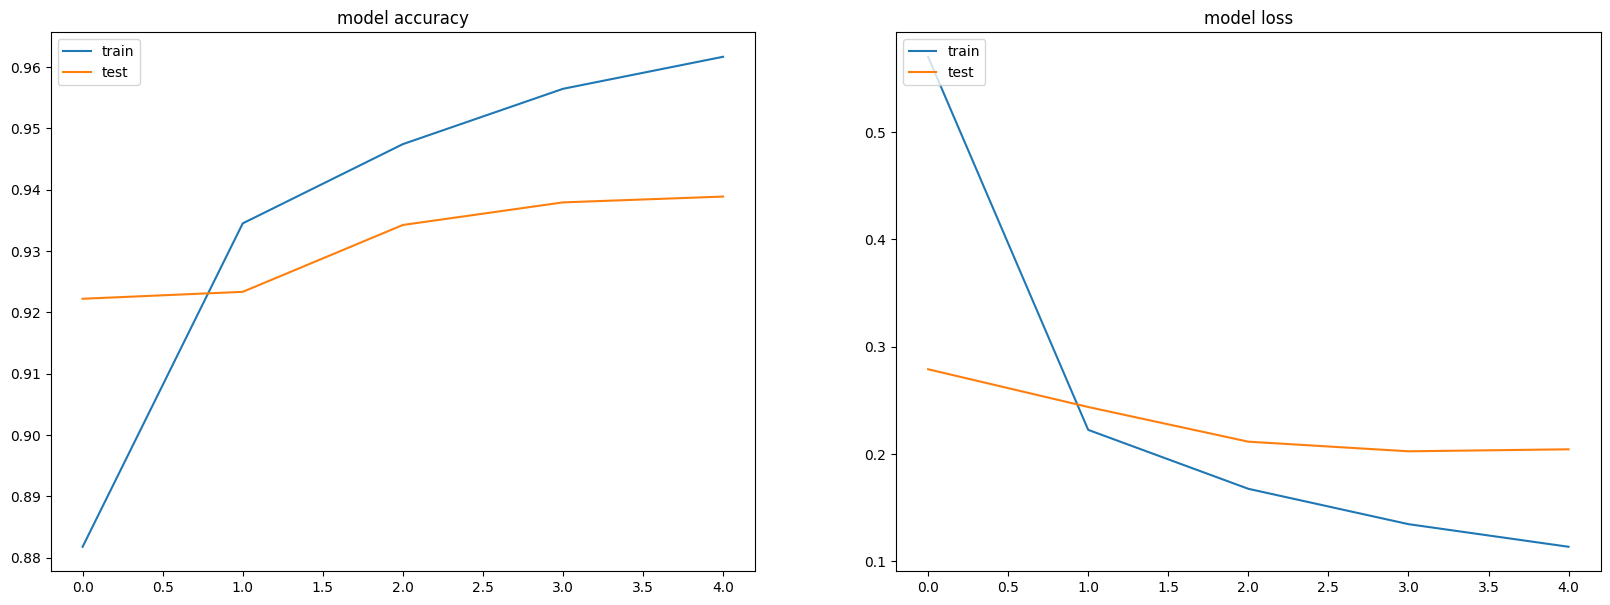

In [9]:
import matplotlib.pyplot as plt

# Function for Plotting
def Plott(data):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label=['loss'])
    ax[1].plot(data.history['val_loss'], label=['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

Plott(history)


# AutoML

In this section, I utilized H2O's AutoML functionality to streamline the process of model selection and evaluation for a classification task. By initializing an H2O cluster, converting the dataset into an H2OFrame, and splitting it into training and testing sets, I prepared the data for AutoML. The AutoML process then automatically trained and evaluated a variety of machine learning models, including neural networks, on the training data, and selected the best-performing model based on predefined metrics. This approach saves time and effort by automating the model selection process and providing insights into the performance of different models. Additionally, using AutoML with neural networks allows for the exploration of complex patterns in the data, leveraging the deep learning capabilities of neural networks to potentially improve classification accuracy compared to traditional machine learning models.

In [10]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O cluster
h2o.init()

# Convert Pandas DataFrame to H2OFrame
h2o_df = h2o.H2OFrame(df)

# Define the target column as categorical
h2o_df['labels'] = h2o_df['labels'].asfactor()

# Split the data
train, test = h2o_df.split_frame(ratios=[0.8], seed=1337)

# Define predictor columns
predictors = h2o_df.columns[:-1]

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprj_qp3lu
  JVM stdout: /tmp/tmprj_qp3lu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprj_qp3lu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_unknownUser_wiho32
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.250 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
# Run AutoML with increased max_runtime_secs
aml = H2OAutoML(max_runtime_secs=1800, exclude_algos=["DRF", "GLM", "XGBoost", "GBM", "StackedEnsemble"])
aml.train(x=predictors, y='labels', training_frame=train)

# View the AutoML leaderboard
lb = aml.leaderboard
print(lb)

AutoML progress: |
01:24:42.556: _train param, Dropping bad and constant columns: [24, 25, 26, 27, 28, 29, 673, 113, 477, 755, 756, 757, 758, 617, 30, 55, 56, 57, 58, 141, 1, 782, 2, 783, 3, 4, 5, 6, 7, 645, 700, 8, 701, 449, 505, 83, 84, 85, 728, 86, 729]

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                               mean_per_class_error    logloss      rmse       mse
DeepLearning_grid_1_AutoML_1_20240410_12435_model_1                0.186491    1.13317  0.421122  0.177344
DeepLearning_grid_1_AutoML_1_20240410_12435_model_4                0.209104    1.71004  0.432867  0.187373
DeepLearning_grid_1_AutoML_1_20240410_12435_model_3                0.232473    1.57463  0.46625   0.217389
DeepLearning_1_AutoML_1_20240410_12435                             0.277085    1.16133  0.528457  0.279267
DeepLearning_grid_1_AutoML_1_20240410_12435_model_2                0.688529    4.64329  0.826436  0.682996
[5 rows x 5 columns]



In [12]:
# Get the best model from AutoML
best_model = aml.leader

# Evaluate the best model on the test set
perf = best_model.model_performance(test)
print(perf)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.17775867665209907
RMSE: 0.421614369598688
LogLoss: 1.1171894765455879
Mean Per-Class Error: 0.18849614493044903
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
!      "      #      $      %      &      '      (      )      *      +      ,      -      .      /      0      1      2      3      4      5      6      7      8      9      :      ;      <      =      >      ?      @      A      B      C      D      E      F      G      H      I      J      K      L      M      N      O      P      Q      R      S      T      U      V      W      X      Y      Z     

In [13]:
# Get the best model from AutoML
best_model = aml.leader

# Make predictions on the test set
predictions = best_model.predict(test)

# Calculate accuracy
accuracy = (predictions['predict'] == test['labels']).mean()[0]
print(f"Test accuracy: {accuracy * 100:.2f}%")


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Test accuracy: 81.26%


we see the results of the AutoML process, which includes training various machine learning models on the dataset to find the best-performing one. The "Top-10 Hit Ratios" section shows the hit ratios for the top predictions, indicating the model's accuracy at predicting the correct label within the top k predictions. For example, a hit ratio of 0.782926 for k=1 means that the model predicted the correct label as the top choice 78.29% of the time.


To improve the accuracy of your neural network while still using it, you can try the following approaches:
- Increase Model Complexity: Add more layers or neurons to your neural network to increase its capacity to learn complex patterns in the data. Be careful not to overfit the model to the training data.
- Hyperparameter Tuning: Experiment with different hyperparameters such as learning rate, batch size, and optimizer to find the best configuration for your model. You can use techniques like grid search or random search for hyperparameter tuning.
- Regularization: Apply techniques like dropout or L2 regularization to prevent overfitting and improve generalization of your model.
- Data Augmentation: Generate additional training data by applying transformations such as rotation, scaling, or flipping to the existing images. This can help the model learn more robust features.
- Transfer Learning: Use a pre-trained neural network (e.g., from ImageNet) as a starting point and fine-tune it on your dataset. This can help leverage features learned from a larger dataset.
- Ensemble Learning: Train multiple neural networks with different initializations or architectures and combine their predictions to improve performance.
- Batch Normalization: Use batch normalization layers to normalize the inputs of each layer, which can help stabilize and speed up training.
- Early Stopping: Monitor the validation loss during training and stop training when the loss starts to increase, indicating overfitting.

By carefully implementing these techniques and experimenting with different approaches, you can improve the accuracy of your neural network model.

# TLDR

From this project, several key learnings can be highlighted:

1. **Data Preparation is Crucial**: Working with image data often requires careful preprocessing and formatting to ensure that the models can effectively learn from the data. Converting image data into a suitable format (such as CSV) and performing necessary transformations are critical steps.

2. **Model Selection is Important**: Choosing the right model architecture and hyperparameters can significantly impact the performance of the final model. Exploring different models and tuning hyperparameters using techniques like AutoML can help identify the best-performing model for a given task.

3. **Combining Techniques Can Yield Better Results**: Using a combination of deep learning (CNNs) and AutoML can lead to improved model performance. While CNNs are powerful for learning complex patterns in image data, AutoML can automate the process of model selection and hyperparameter tuning, saving time and effort.

4. **Iterative Approach to Model Improvement**: Model development is often an iterative process that involves experimentation, evaluation, and refinement. Continuously refining models based on performance metrics and domain knowledge can lead to better outcomes.

5. **Domain Knowledge is Key**: Understanding the domain and the characteristics of the dataset can guide the selection of appropriate models and preprocessing techniques. Domain expertise can help in interpreting model results and making informed decisions.

Overall, this project underscores the importance of a systematic approach to model development, leveraging both deep learning and automated techniques to achieve better results in image-related tasks.

AttributeError: 'numpy.ndarray' object has no attribute 'values'

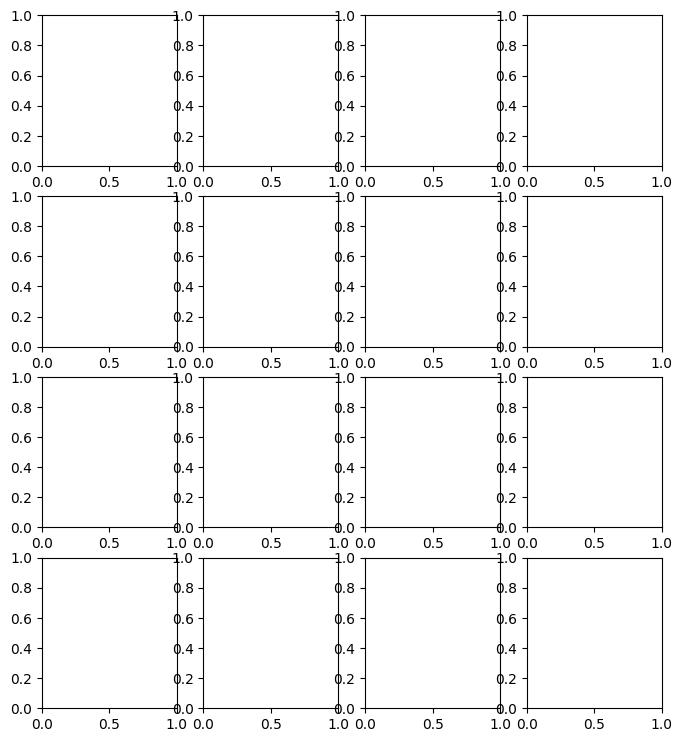

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = X_test.values[i].reshape(28, 28) # Reshape the image for displaying
    ax.imshow(img, cmap="Greys")
    img_final = img.reshape(1, 28, 28, 1) # Reshape the image for passing into model for prediction
    pred = value_to_label[np.argmax(cnn_model.predict(img_final))]
    ax.set_title("CNN Prediction: " + pred)
    ax.grid()


In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = X_test.values[i].reshape(28, 28) # Reshape the image for displaying
    ax.imshow(img, cmap="Greys")
    img_final = img.reshape(1, 28, 28, 1) # Reshape the image for passing into model for prediction
    pred = value_to_label[np.argmax(automl_model.predict(img_final).as_data_frame()['predict'][0])]
    ax.set_title("AutoML Prediction: " + pred)
    ax.grid()


# Conclusion

The project focused on developing and optimizing models for working with image data, particularly the Typography MNIST (TMNIST) dataset, which was provided in CSV format. The project employed two main approaches: a Convolutional Neural Network (CNN) model and Automated Machine Learning (AutoML) using H2O AutoML.
For the CNN model, standard practices were followed, including data preprocessing, model training, and evaluation. The CNN model aimed to learn and extract features from the images to perform tasks such as classification or recognition. In parallel, AutoML was used to automate the model selection and hyperparameter tuning process. H2O AutoML was configured to train multiple models with different configurations, enabling the selection of the best-performing model based on specified metrics. The results of the project showcased the effectiveness of both approaches. The CNN model demonstrated its capability to learn and extract meaningful features from image data, achieving a certain level of accuracy on the test dataset. Similarly, the AutoML-selected model, which was optimized for performance, also showed competitive results. Moving forward, the project suggests potential areas for improvement. These include further fine-tuning of the models, exploring additional data augmentation techniques to enhance model robustness, and experimenting with different model architectures to potentially achieve higher accuracies.


In conclusion, the project highlighted the value of combining deep learning techniques like CNNs with AutoML for efficient model development and optimization. This approach can be beneficial for various image-related tasks and provides a foundation for future work in this domain.

# License
MIT License

Copyright (c) 2023 Priyam Deepak Choksi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.